In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
from qiskit_metal import designs
from qiskit_metal import MetalGUI, Dict

design = designs.DesignPlanar()
gui = MetalGUI(design)

design.overwrite_enabled = True

In [7]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

optionsQ = dict(
    pad_width = '425 um',
    pocket_height = '650 um',
    connection_pads = dict(
        a = dict(loc_W=+1,loc_H=+1),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='-1.5mm', pos_y='+0.0mm', **optionsQ))
q2 = TransmonPocket(design, 'Q2', options = dict(pos_x='+0.35mm', pos_y='+1.0mm', orientation = '90',**optionsQ))
q3 = TransmonPocket(design, 'Q3', options = dict(pos_x='2.0mm', pos_y='+0.0mm', **optionsQ))

gui.rebuild()
gui.autoscale()
gui.highlight_components(['Q1', 'Q2', 'Q3']) 

In [8]:
# Using CPW meanders to connect the 3 Qbits

from qiskit_metal.qlibrary.interconnects.meandered import RouteMeander
RouteMeander.get_template_options(design)

{'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'chip': 'main',
 'layer': '1',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true'}

In [9]:
ops = dict(fillet='90um')

In [10]:
# define the first CPW QComponent
options = Dict(
    total_length= '8mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q1',
            pin= 'a'),
        end_pin=Dict(
            component= 'Q2',
            pin= 'b')),
    lead=Dict(
        start_straight='0mm',
        end_straight='0.5mm'),
    meander=Dict(
       asymmetry='-1mm'),
    **ops
)

# Below I am creating a CPW without assigning its name.
#  Therefore running this cell twice will create two CPW's instead of overwriting the previous one
#  To prevent that we add the cpw.delete() statement.
#  The try-except wrapping is needed to suppress errors during the first run of this cell
try:
    cpw.delete()
except NameError: pass

cpw = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()

01:15PM 35s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapley geometry.
01:15PM 35s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapley geometry.
01:15PM 36s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapley geometry.
01:15PM 36s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapley geometry.


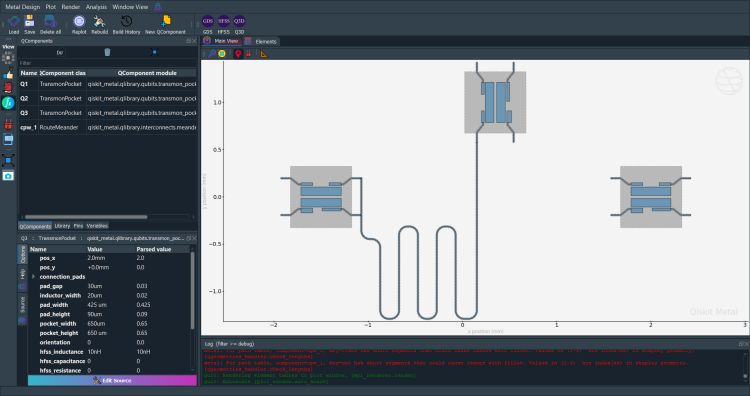

In [11]:
gui.screenshot()

In [12]:
cpw.get_points()

array([[-1.075     ,  0.195     ],
       [-1.07      ,  0.195     ],
       [-1.07      , -0.44916667],
       [-0.87      , -0.44916667],
       [-0.87      , -1.29421683],
       [-0.67      , -1.29421683],
       [-0.67      , -0.31578317],
       [-0.47      , -0.31578317],
       [-0.47      , -1.29421683],
       [-0.27      , -1.29421683],
       [-0.27      , -0.31578317],
       [-0.07      , -0.31578317],
       [-0.07      , -1.29421683],
       [ 0.155     , -1.29421683],
       [ 0.155     ,  0.575     ]])

In [13]:
cpw.options['lead']['start_straight']='100um'
gui.rebuild()
gui.autoscale()

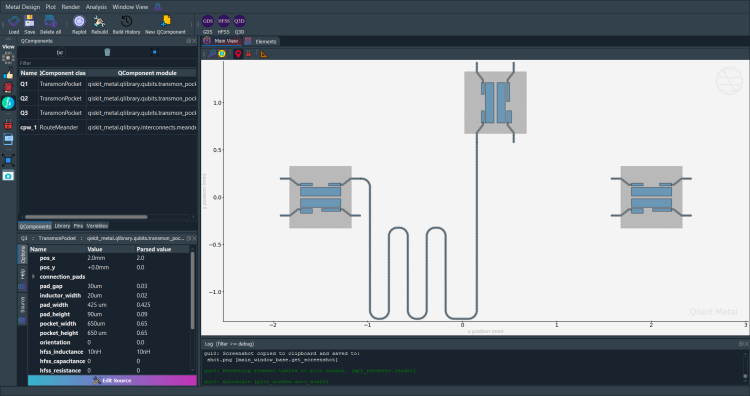

In [14]:
gui.screenshot()

In [15]:
cpw.options['prevent_short_edges']='false'
gui.rebuild()
gui.autoscale()

01:34PM 37s WARNING [check_lengths]: For path table, component=cpw_1, key=trace has short segments that could cause issues with fillet. Values in (12-13)  are index(es) in shapley geometry.
01:34PM 37s WARNING [check_lengths]: For path table, component=cpw_1, key=cut has short segments that could cause issues with fillet. Values in (12-13)  are index(es) in shapley geometry.


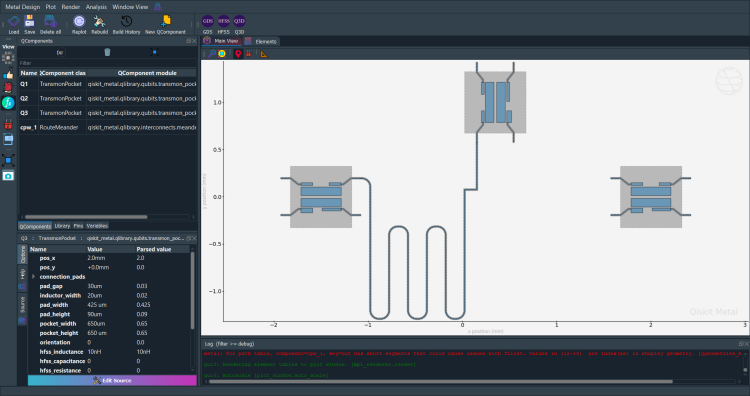

In [16]:
gui.screenshot()

In [17]:
cpw.options['fillet']='65um'
gui.rebuild()
gui.autoscale()

In [18]:
options = Dict(
    total_length= '6mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q2',
            pin= 'd'),
        end_pin=Dict(
            component= 'Q3',
            pin= 'b')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.2mm'),
    meander=Dict(
       asymmetry='-0.9mm'),
    **ops
)

try:
    cpw2.delete()
except NameError: pass

cpw2 = RouteMeander(design,options=options)
gui.rebuild()
gui.autoscale()

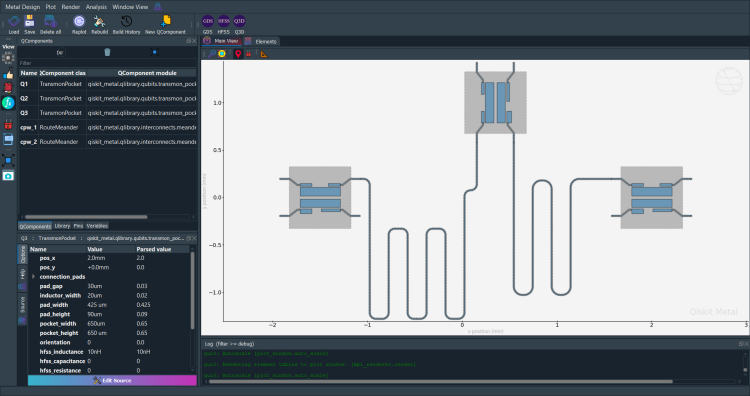

In [19]:
gui.screenshot()

In [20]:
options = Dict(
    total_length= '8mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q3',
            pin= 'a'),
        end_pin=Dict(
            component= 'Q2',
            pin= 'c')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.1mm'),
    meander=Dict(
       asymmetry='-1mm'),
    **ops
)

try:
    cpw3.delete()
except NameError: pass

cpw3 = RouteMeander(design,options=options)
gui.rebuild()
gui.autoscale()

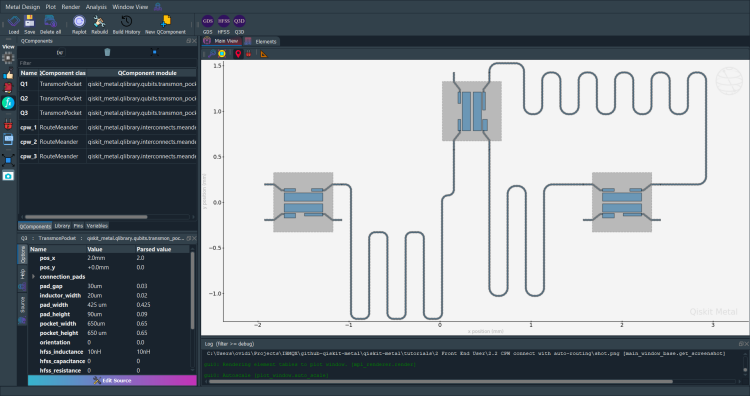

In [21]:
gui.screenshot()

In [22]:
options = Dict(
    total_length= '8mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q1',
            pin= 'b'),
        end_pin=Dict(
            component= 'Q2',
            pin= 'a')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.1mm'),
    meander=Dict(
       asymmetry='1mm'),
    **ops
)

try:
    cpw4.delete()
except NameError: pass

cpw4 = RouteMeander(design,options=options)
gui.rebuild()
gui.autoscale()

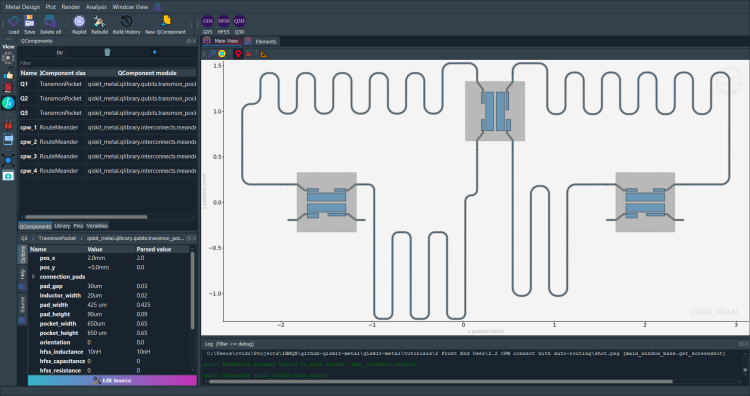

In [23]:
gui.screenshot()

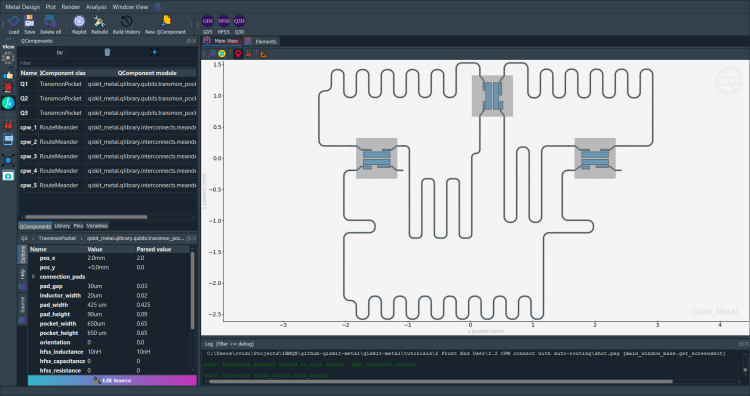

In [24]:
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '800um']
jogs[1] = ["L", '500um']
jogs[2] = ["R", '200um']
jogs[3] = ["R", '500um']

options = Dict(
    total_length= '14mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q1',
            pin= 'd'),
        end_pin=Dict(
            component= 'Q3',
            pin= 'd')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm',
        start_jogged_extension=jogs,
        end_jogged_extension=jogs),
    meander=Dict(
       asymmetry='-1.2mm'),
    **ops
)

try:
    cpw5.delete()
except NameError: pass

cpw5 = RouteMeander(design,options=options)
gui.rebuild()
gui.autoscale()
gui.screenshot()

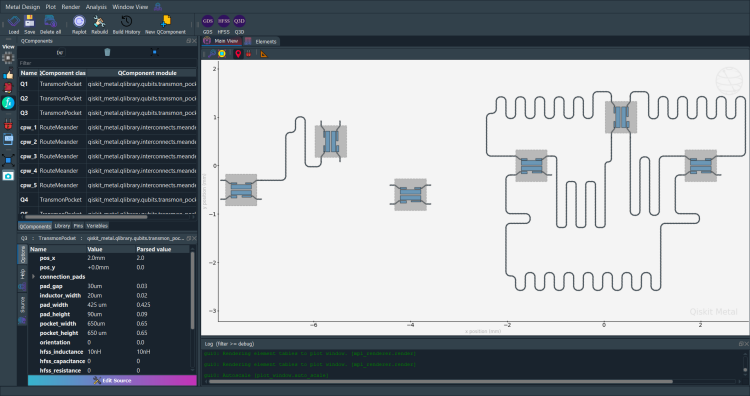

In [25]:
q4 = TransmonPocket(design, 'Q4', options = dict(pos_x='-7.5mm', pos_y='-0.5mm', **optionsQ))
q5 = TransmonPocket(design, 'Q5', options = dict(pos_x='-5.65mm', pos_y='+0.5mm', orientation = '90',**optionsQ))
q6 = TransmonPocket(design, 'Q6', options = dict(pos_x='-4.0mm', pos_y='-0.6mm', **optionsQ))
gui.rebuild()

options = Dict(
    total_length= '3.4mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q4',
            pin= 'a'),
        end_pin=Dict(
            component= 'Q5',
            pin= 'b')),
    lead=Dict(
        start_straight='0.5mm',
        end_straight='0.1mm'),
    meander=Dict(
       asymmetry='1mm'),
    **ops
)
try:
    cpw6.delete()
except NameError: pass
cpw6 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()
gui.screenshot()

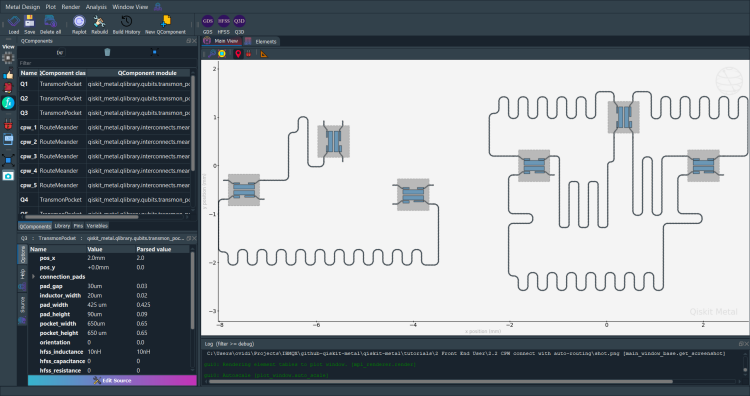

In [26]:
options = Dict(
    total_length= '12mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q4',
            pin= 'd'),
        end_pin=Dict(
            component= 'Q6',
            pin= 'c')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm'),
    meander=Dict(
       asymmetry='-1.2mm'),
    **ops
)
try:
    cpw7.delete()
except NameError: pass
cpw7 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [ ]:
options = Dict(
    total_length= '13mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q6',
            pin= 'a'),
        end_pin=Dict(
            component= 'Q4',
            pin= 'b')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm'),
    meander=Dict(
       asymmetry='-1.7mm'),
    **ops
)
try:
    cpw8.delete()
except NameError: pass
cpw8 = RouteMeander(design, options=options)
gui.rebuild()
gui.autoscale()
gui.screenshot()